In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
matches=pd.read_csv('https://raw.githubusercontent.com/Afthab-P-A/ipl_prediction/refs/heads/main/matches.csv')
matches

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [ ]:
matches.shape

(756, 18)

In [ ]:
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
matches.tail()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [ ]:
matches.dtypes

,0
id,int64
Season,object
city,object
date,object
team1,object
team2,object
toss_winner,object
toss_decision,object
result,object
dl_applied,int64


In [ ]:
matches.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [ ]:
matches.isna().sum()

,0
id,0
Season,0
city,7
date,0
team1,0
team2,0
toss_winner,0
toss_decision,0
result,0
dl_applied,0


In [ ]:
matches.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [ ]:
matches.drop(['Season','date', 'toss_winner','toss_decision', 'result', 'win_by_runs',
              'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2','umpire3'],inplace=True,axis=1)

In [ ]:
matches['winner']=matches['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
matches['winner']=matches['winner'].str.replace('Delhi Daredevils','Delhi Capitals')


In [ ]:
matches['winner'].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians', 'Delhi Capitals',
       'Gujarat Lions', 'Chennai Super Kings', 'Rajasthan Royals',
       'Pune Warriors', 'Kochi Tuskers Kerala', nan,
       'Rising Pune Supergiants'], dtype=object)

In [ ]:
teams=['Sunrisers Hyderabad', 'Mumbai Indians', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals']

In [ ]:
matches=matches[matches['team1'].isin(teams)]
matches=matches[matches['team2'].isin(teams)]

In [ ]:
matches['winner'].value_counts()

,count
winner,
Mumbai Indians,83
Chennai Super Kings,77
Kolkata Knight Riders,64
Kings XI Punjab,54
Royal Challengers Bangalore,53
Rajasthan Royals,52
Sunrisers Hyderabad,42
Delhi Capitals,10


In [ ]:
order=matches['winner'].value_counts().index
order

Index(['Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders',
       'Kings XI Punjab', 'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Sunrisers Hyderabad', 'Delhi Capitals'],
      dtype='object', name='winner')

<Axes: title={'center': 'Teams-Win count graph'}, xlabel='Win-Count', ylabel='Teams'>

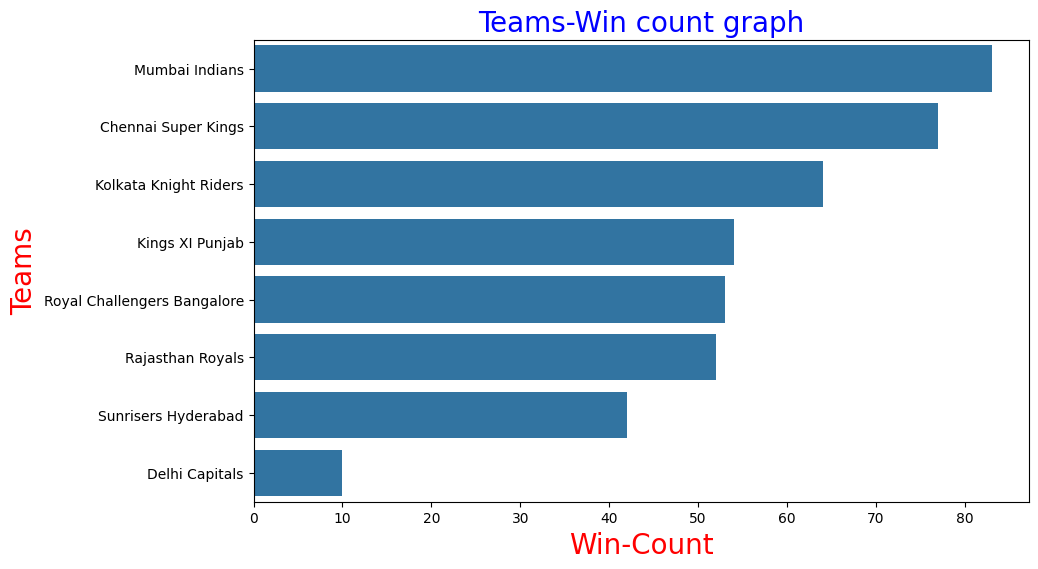

In [ ]:
plt.figure(figsize=(10,6))
plt.xlabel('Win-Count',color='red',fontsize=20)
plt.ylabel('Teams',color='red',fontsize=20)
plt.title('Teams-Win count graph',fontsize=20,color='b')
sns.countplot(y=matches['winner'],data=matches,order=order)

In [ ]:
matches['dl_applied'].value_counts()

,count
dl_applied,
0,427
1,10


In [ ]:
matches=matches[matches['dl_applied']==0]

In [ ]:
deliveries=pd.read_csv('https://raw.githubusercontent.com/Afthab-P-A/ipl_prediction/refs/heads/main/deliveries.csv')
deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [ ]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
deliveries.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [ ]:
deliveries.isna().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batsman,0
non_striker,0
bowler,0
is_super_over,0


In [ ]:
deliveries['player_dismissed']=deliveries['player_dismissed'].fillna('0')

In [ ]:
deliveries['player_dismissed']=deliveries['player_dismissed'].apply(lambda x:x if x=='0' else '1')

In [ ]:
deliveries['player_dismissed']=deliveries['player_dismissed'].astype(int)

In [ ]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [ ]:
deliveries.drop(['batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
                 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
                 'batsman_runs', 'extra_runs','dismissal_kind', 'fielder'],inplace=True,axis=1)

In [ ]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,total_runs,player_dismissed
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,4,0
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,2,0


In [ ]:
scores=deliveries.groupby(['match_id','inning']).sum() [['total_runs','player_dismissed']].reset_index()

In [ ]:
scores

,match_id,inning,total_runs,player_dismissed
0,1,1,207,4
1,1,2,172,10
2,2,1,184,8
3,2,2,187,3
4,3,1,183,4
...,...,...,...,...
1523,11413,2,170,7
1524,11414,1,155,9
1525,11414,2,162,4
1526,11415,1,152,8


In [ ]:
scores=scores[scores.inning==1]
scores

,match_id,inning,total_runs,player_dismissed
0,1,1,207,4
2,2,1,184,8
4,3,1,183,4
6,4,1,163,6
8,5,1,157,8
...,...,...,...,...
1518,11347,1,143,7
1520,11412,1,136,4
1522,11413,1,171,7
1524,11414,1,155,9


In [ ]:
match_df=matches.merge(scores[['match_id','total_runs']],left_on='id',right_on='match_id')
match_df

,id,city,team1,team2,dl_applied,winner,match_id,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,0,Sunrisers Hyderabad,1,207
1,7,Mumbai,Kolkata Knight Riders,Mumbai Indians,0,Mumbai Indians,7,178
2,8,Indore,Royal Challengers Bangalore,Kings XI Punjab,0,Kings XI Punjab,8,148
3,10,Mumbai,Sunrisers Hyderabad,Mumbai Indians,0,Mumbai Indians,10,158
4,11,Kolkata,Kings XI Punjab,Kolkata Knight Riders,0,Kolkata Knight Riders,11,170
...,...,...,...,...,...,...,...,...
422,11347,Mumbai,Kolkata Knight Riders,Mumbai Indians,0,Mumbai Indians,11347,143
423,11412,Chennai,Chennai Super Kings,Mumbai Indians,0,Mumbai Indians,11412,136
424,11413,Visakhapatnam,Sunrisers Hyderabad,Delhi Capitals,0,Delhi Capitals,11413,171
425,11414,Visakhapatnam,Delhi Capitals,Chennai Super Kings,0,Chennai Super Kings,11414,155


In [ ]:
match_df=match_df[['match_id','city','winner','total_runs']]
match_df

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,207
1,7,Mumbai,Mumbai Indians,178
2,8,Indore,Kings XI Punjab,148
3,10,Mumbai,Mumbai Indians,158
4,11,Kolkata,Kolkata Knight Riders,170
...,...,...,...,...
422,11347,Mumbai,Mumbai Indians,143
423,11412,Chennai,Mumbai Indians,136
424,11413,Visakhapatnam,Delhi Capitals,171
425,11414,Visakhapatnam,Chennai Super Kings,155


In [ ]:
deliveries=deliveries[deliveries['inning']==2]

In [ ]:
match_df=match_df.merge(deliveries,on='match_id')

In [ ]:
match_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,total_runs_y,player_dismissed
0,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,1,0
1,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,0,0
2,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,0,0
3,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,2,0
4,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...
49541,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,1,0
49542,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,2,0
49543,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,1,1
49544,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,2,0


In [ ]:
match_df['scores']=match_df.groupby('match_id')['total_runs_y'].cumsum()
match_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,total_runs_y,player_dismissed,scores
0,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,1,0,1
1,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,0,0,1
2,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,0,0,1
3,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,2,0,3
4,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,4,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
49541,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,1,0,152
49542,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,2,0,154
49543,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,1,1,155
49544,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,2,0,157


In [ ]:
match_df['runs left']=(match_df['total_runs_x']-match_df['scores'])+1

In [ ]:
match_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,total_runs_y,player_dismissed,scores,runs left
0,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,1,0,1,207
1,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,0,0,1,207
2,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,0,0,1,207
3,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,2,0,3,205
4,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,4,0,7,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49541,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,1,0,152,1
49542,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,2,0,154,-1
49543,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,1,1,155,-2
49544,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,2,0,157,-4


In [ ]:
match_df['runs left']=match_df['runs left'].apply(lambda x:x if x>=0 else 0)
match_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,total_runs_y,player_dismissed,scores,runs left
0,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,1,0,1,207
1,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,0,0,1,207
2,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,0,0,1,207
3,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,2,0,3,205
4,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,4,0,7,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49541,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,1,0,152,1
49542,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,2,0,154,0
49543,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,1,1,155,0
49544,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,2,0,157,0


In [ ]:
match_df['balls left']=(120-((match_df.over*6)+match_df.ball))+6
match_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,total_runs_y,player_dismissed,scores,runs left,balls left
0,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,1,0,1,207,119
1,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,0,0,1,207,118
2,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,0,0,1,207,117
3,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,2,0,3,205,116
4,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,4,0,7,201,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49541,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,1,0,152,1,4
49542,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,2,0,154,0,3
49543,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,1,1,155,0,2
49544,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,2,0,157,0,1


In [ ]:
match_df.tail()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,total_runs_y,player_dismissed,scores,runs left,balls left
49541,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,1,0,152,1,4
49542,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,2,0,154,0,3
49543,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,1,1,155,0,2
49544,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,2,0,157,0,1
49545,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,6,0,1,157,0,0


In [ ]:
match_df['wickets']=match_df.groupby('match_id')['player_dismissed'].cumsum()
match_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,total_runs_y,player_dismissed,scores,runs left,balls left,wickets
0,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,1,0,1,207,119,0
1,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,0,0,1,207,118,0
2,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,0,0,1,207,117,0
3,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,2,0,3,205,116,0
4,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,4,0,7,201,115,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49541,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,1,0,152,1,4,5
49542,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,2,0,154,0,3,5
49543,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,1,1,155,0,2,6
49544,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,2,0,157,0,1,6


In [ ]:
match_df['wikets_left']=10-match_df.wickets
match_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,total_runs_y,player_dismissed,scores,runs left,balls left,wickets,wikets_left
0,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,1,0,1,207,119,0,10
1,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,0,0,1,207,118,0,10
2,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,0,0,1,207,117,0,10
3,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,2,0,3,205,116,0,10
4,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,4,0,7,201,115,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49541,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,1,0,152,1,4,5,5
49542,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,2,0,154,0,3,5,5
49543,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,1,1,155,0,2,6,4
49544,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,2,0,157,0,1,6,4


In [ ]:
match_df['winners']=0

In [ ]:
match_df['winners'] = match_df.apply(lambda x: 1 if x['winner'] == x['batting_team'] else 0,axis=1)


In [ ]:
match_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,total_runs_y,player_dismissed,scores,runs left,balls left,wickets,wikets_left,winners
0,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,1,0,1,207,119,0,10,0
1,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,0,0,1,207,118,0,10,0
2,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,0,0,1,207,117,0,10,0
3,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,2,0,3,205,116,0,10,0
4,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,4,0,7,201,115,0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49541,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,1,0,152,1,4,5,5,0
49542,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,2,0,154,0,3,5,5,0
49543,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,1,1,155,0,2,6,4,0
49544,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,2,0,157,0,1,6,4,0


In [ ]:
match_df['current run rate']=round(((match_df['total_runs_x']+1-match_df['runs left']) / (120-match_df['balls left']))*6,2)

In [ ]:
match_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,total_runs_y,player_dismissed,scores,runs left,balls left,wickets,wikets_left,winners,current run rate
0,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,1,0,1,207,119,0,10,0,6.00
1,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,0,0,1,207,118,0,10,0,3.00
2,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,0,0,1,207,117,0,10,0,2.00
3,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,2,0,3,205,116,0,10,0,4.50
4,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,4,0,7,201,115,0,10,0,8.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49541,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,1,0,152,1,4,5,5,0,7.86
49542,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,2,0,154,0,3,5,5,0,7.85
49543,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,1,1,155,0,2,6,4,0,7.78
49544,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,2,0,157,0,1,6,4,0,7.71


In [ ]:
match_df['recquired run rate']=round((match_df['runs left']/match_df['balls left'])*6,2)
match_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,total_runs_y,player_dismissed,scores,runs left,balls left,wickets,wikets_left,winners,current run rate,recquired run rate
0,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,1,0,1,207,119,0,10,0,6.00,10.44
1,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,0,0,1,207,118,0,10,0,3.00,10.53
2,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,0,0,1,207,117,0,10,0,2.00,10.62
3,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,2,0,3,205,116,0,10,0,4.50,10.60
4,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,4,0,7,201,115,0,10,0,8.40,10.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49541,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,1,0,152,1,4,5,5,0,7.86,1.50
49542,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,2,0,154,0,3,5,5,0,7.85,0.00
49543,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,1,1,155,0,2,6,4,0,7.78,0.00
49544,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,2,0,157,0,1,6,4,0,7.71,0.00


In [ ]:
match_df.columns

Index(['match_id', 'city', 'winner', 'total_runs_x', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'total_runs_y', 'player_dismissed',
       'scores', 'runs left', 'balls left', 'wickets', 'wikets_left',
       'winners', 'current run rate', 'recquired run rate'],
      dtype='object')

In [ ]:
winners_df=match_df[['match_id','city','batting_team','bowling_team','total_runs_x','balls left','wikets_left', 'current run rate', 'recquired run rate','winners']]

In [ ]:
winners_df

,match_id,city,batting_team,bowling_team,total_runs_x,balls left,wikets_left,current run rate,recquired run rate,winners
0,1,Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,207,119,10,6.00,10.44,0
1,1,Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,207,118,10,3.00,10.53,0
2,1,Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,207,117,10,2.00,10.62,0
3,1,Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,207,116,10,4.50,10.60,0
4,1,Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,207,115,10,8.40,10.49,0
...,...,...,...,...,...,...,...,...,...,...
49541,11415,Hyderabad,Chennai Super Kings,Mumbai Indians,152,4,5,7.86,1.50,0
49542,11415,Hyderabad,Chennai Super Kings,Mumbai Indians,152,3,5,7.85,0.00,0
49543,11415,Hyderabad,Chennai Super Kings,Mumbai Indians,152,2,4,7.78,0.00,0
49544,11415,Hyderabad,Chennai Super Kings,Mumbai Indians,152,1,4,7.71,0.00,0


In [ ]:
winners_df['recquired run rate']=winners_df['recquired run rate'].replace([np.inf, -np.inf], np.nan)

<ipython-input-55-464a32de6383>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winners_df['recquired run rate']=winners_df['recquired run rate'].replace([np.inf, -np.inf], np.nan)


In [ ]:
winners_df.isna().sum()

,0
match_id,0
city,589
batting_team,0
bowling_team,0
total_runs_x,0
balls left,0
wikets_left,0
current run rate,0
recquired run rate,161
winners,0


In [ ]:
numeric_cols=['total_runs_x','balls left','wikets_left', 'current run rate','recquired run rate']

In [ ]:
cat_columns=['city', 'batting_team', 'bowling_team']

In [ ]:
ipl_pred_df=winners_df.dropna(subset=['city'])

In [ ]:
ipl_pred_df.shape

(48957, 10)

In [ ]:
ipl_pred_df['recquired run rate']=ipl_pred_df['recquired run rate'].fillna(0)

<ipython-input-61-4cb277005910>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipl_pred_df['recquired run rate']=ipl_pred_df['recquired run rate'].fillna(0)


In [ ]:
ipl_pred_df.isna().sum()

,0
match_id,0
city,0
batting_team,0
bowling_team,0
total_runs_x,0
balls left,0
wikets_left,0
current run rate,0
recquired run rate,0
winners,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer


In [ ]:
x=ipl_pred_df.iloc[:,1:-1]
y=ipl_pred_df.iloc[:,-1]

In [ ]:
x

,city,batting_team,bowling_team,total_runs_x,balls left,wikets_left,current run rate,recquired run rate
0,Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,207,119,10,6.00,10.44
1,Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,207,118,10,3.00,10.53
2,Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,207,117,10,2.00,10.62
3,Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,207,116,10,4.50,10.60
4,Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,207,115,10,8.40,10.49
...,...,...,...,...,...,...,...,...
49541,Hyderabad,Chennai Super Kings,Mumbai Indians,152,4,5,7.86,1.50
49542,Hyderabad,Chennai Super Kings,Mumbai Indians,152,3,5,7.85,0.00
49543,Hyderabad,Chennai Super Kings,Mumbai Indians,152,2,4,7.78,0.00
49544,Hyderabad,Chennai Super Kings,Mumbai Indians,152,1,4,7.71,0.00


In [ ]:
x.values[5]

array(['Hyderabad', 'Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       207, 114, 10, 11.0, 10.37], dtype=object)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [ ]:
num_pipeline=Pipeline(steps=[
    ('scale',StandardScaler())
])

In [ ]:
cat_pipeline=Pipeline(steps=[
    ('ohe-hot',OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])

In [ ]:
col_trans=ColumnTransformer(transformers=[
    ('numeric',num_pipeline,numeric_cols),
    ('category',cat_pipeline,cat_columns)
],remainder='passthrough',n_jobs=-1)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [ ]:
pipe=make_pipeline(col_trans,model)

In [ ]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['total_runs_x', 'balls left',
                                                   'wikets_left',
                                                   'current run rate',
                                                   'recquired run rate']),
                                                 ('category',
                                                  Pipeline(steps=[('ohe-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['city', 'batting_team',
                                                   'bowling_team'])])),
                ('logisticregression', LogisticRegression())])

In [ ]:
y_pred=pipe.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.7976579520697168

In [ ]:
import pickle

In [ ]:
filename="ipl_model.sav"
pickle.dump(pipe,open(filename,"wb"))

In [ ]:
x.columns

Index(['city', 'batting_team', 'bowling_team', 'total_runs_x', 'balls left',
       'wikets_left', 'current run rate', 'recquired run rate'],
      dtype='object')

In [ ]:
x['city'].unique()

array(['Hyderabad', 'Mumbai', 'Indore', 'Kolkata', 'Bangalore',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Ahmedabad', 'Dharamsala', 'Ranchi', 'Delhi', 'Abu Dhabi',
       'Sharjah', 'Cuttack', 'Pune', 'Visakhapatnam', 'Bengaluru',
       'Mohali'], dtype=object)

In [ ]:
x['batting_team'].unique()

array(['Royal Challengers Bangalore', 'Mumbai Indians', 'Kings XI Punjab',
       'Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Rajasthan Royals',
       'Chennai Super Kings', 'Delhi Capitals'], dtype=object)